### Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
%matplotlib widget

import statsmodels.api as sm

#### Importação da base de dados

In [2]:
df = pd.read_csv('dados/base_funcionarios_v2.csv', sep=';', index_col='id')
df.shape

(46, 3)

In [3]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


#### Análise Exploratória dos Dados

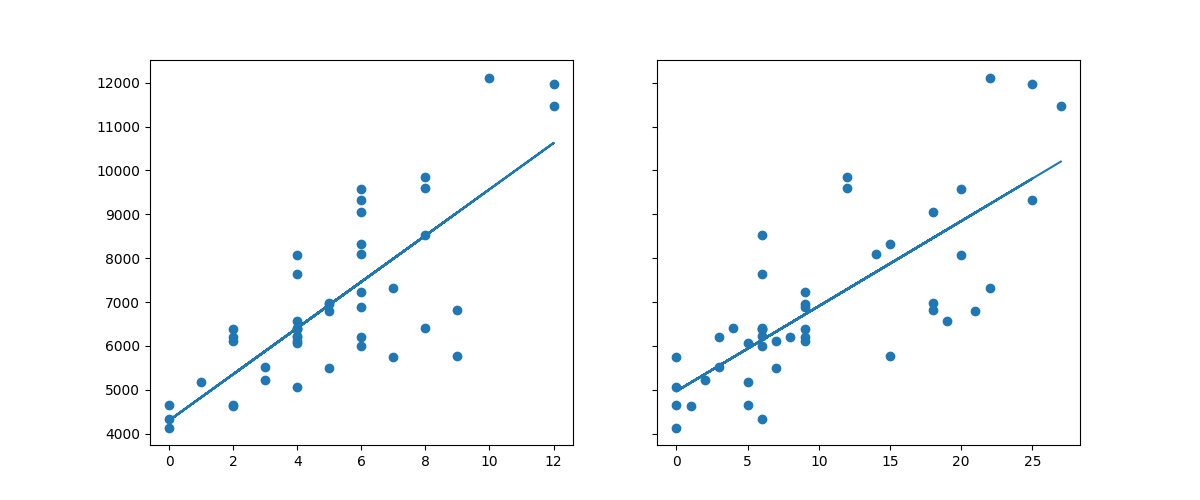

In [4]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
ax1.scatter(df['Anos_Educ_Superior'], df['Salario']);

m,b = np.polyfit(df['Anos_Educ_Superior'], df['Salario'], 1)

ax1.plot(df['Anos_Educ_Superior'], m*df['Anos_Educ_Superior'] + b)

ax2.scatter(df['Tempo_Empresa'], df['Salario']);

m,b = np.polyfit(df['Tempo_Empresa'], df['Salario'], 1)

ax2.plot(df['Tempo_Empresa'], m*df['Tempo_Empresa'] + b);

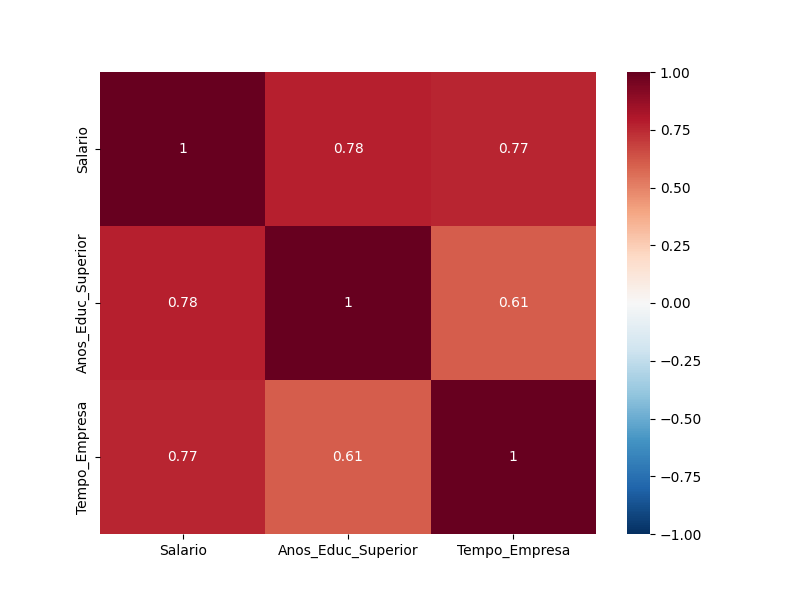

In [6]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='RdBu_r', vmin=-1, vmax=1,
            annot=True);

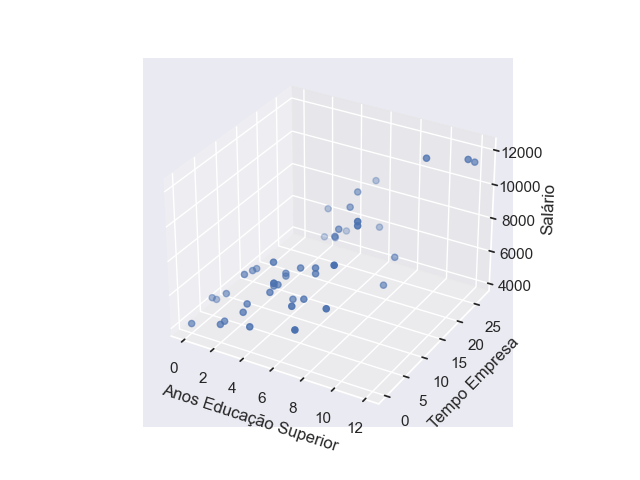

In [7]:
sns.set(style="darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['Anos_Educ_Superior']
y = df['Tempo_Empresa']
z = df['Salario']

ax.set_xlabel('Anos Educação Superior')
ax.set_ylabel('Tempo Empresa')
ax.set_zlabel('Salário')

ax.scatter(x, y, z)

plt.show()

### Ajuste do Modelo de Regressão usando a biblioteca Statsmodels

In [8]:
y = df['Salario']

df['intercepto'] = 1
x = df[['intercepto', 'Anos_Educ_Superior', 'Tempo_Empresa']]

In [9]:
modelo = sm.OLS(y, x)
resultado = modelo.fit()

In [11]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Mon, 27 May 2024   Prob (F-statistic):           2.66e-13
Time:                        11:13:25   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309

### Interpretação dos Coeficientes

**Intercepto** ou $\beta_0$: Salário médio de um colaborador sem educação superior e recém chegado na empresa é
de R$ 4.056,06. \
$\beta_1$ x Anos de Educação Superior: Cada ano adicional de educação superior, mantendo tempo de empresa constante,
gera um aumento médio de R$ 335,39. \
$\beta_2$ x Tempo de Empresa: Cada ano adicional de tempo de empresa, mantendo os anos de educação superior constante,
gera um aumento médio de R$ 117,66